### DATASET: [TLC Trip Record Data Yellow Taxi (June 2022)](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-06.parquet)

In [33]:
!pip install pdf2image
!sudo apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [34]:
# importing necessary libraries and packages
import pandas as pd
from pdf2image import convert_from_path
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
output_notebook()

In [35]:
# read dataset
df = pd.read_parquet("/content/yellow_tripdata_2022-06.parquet")

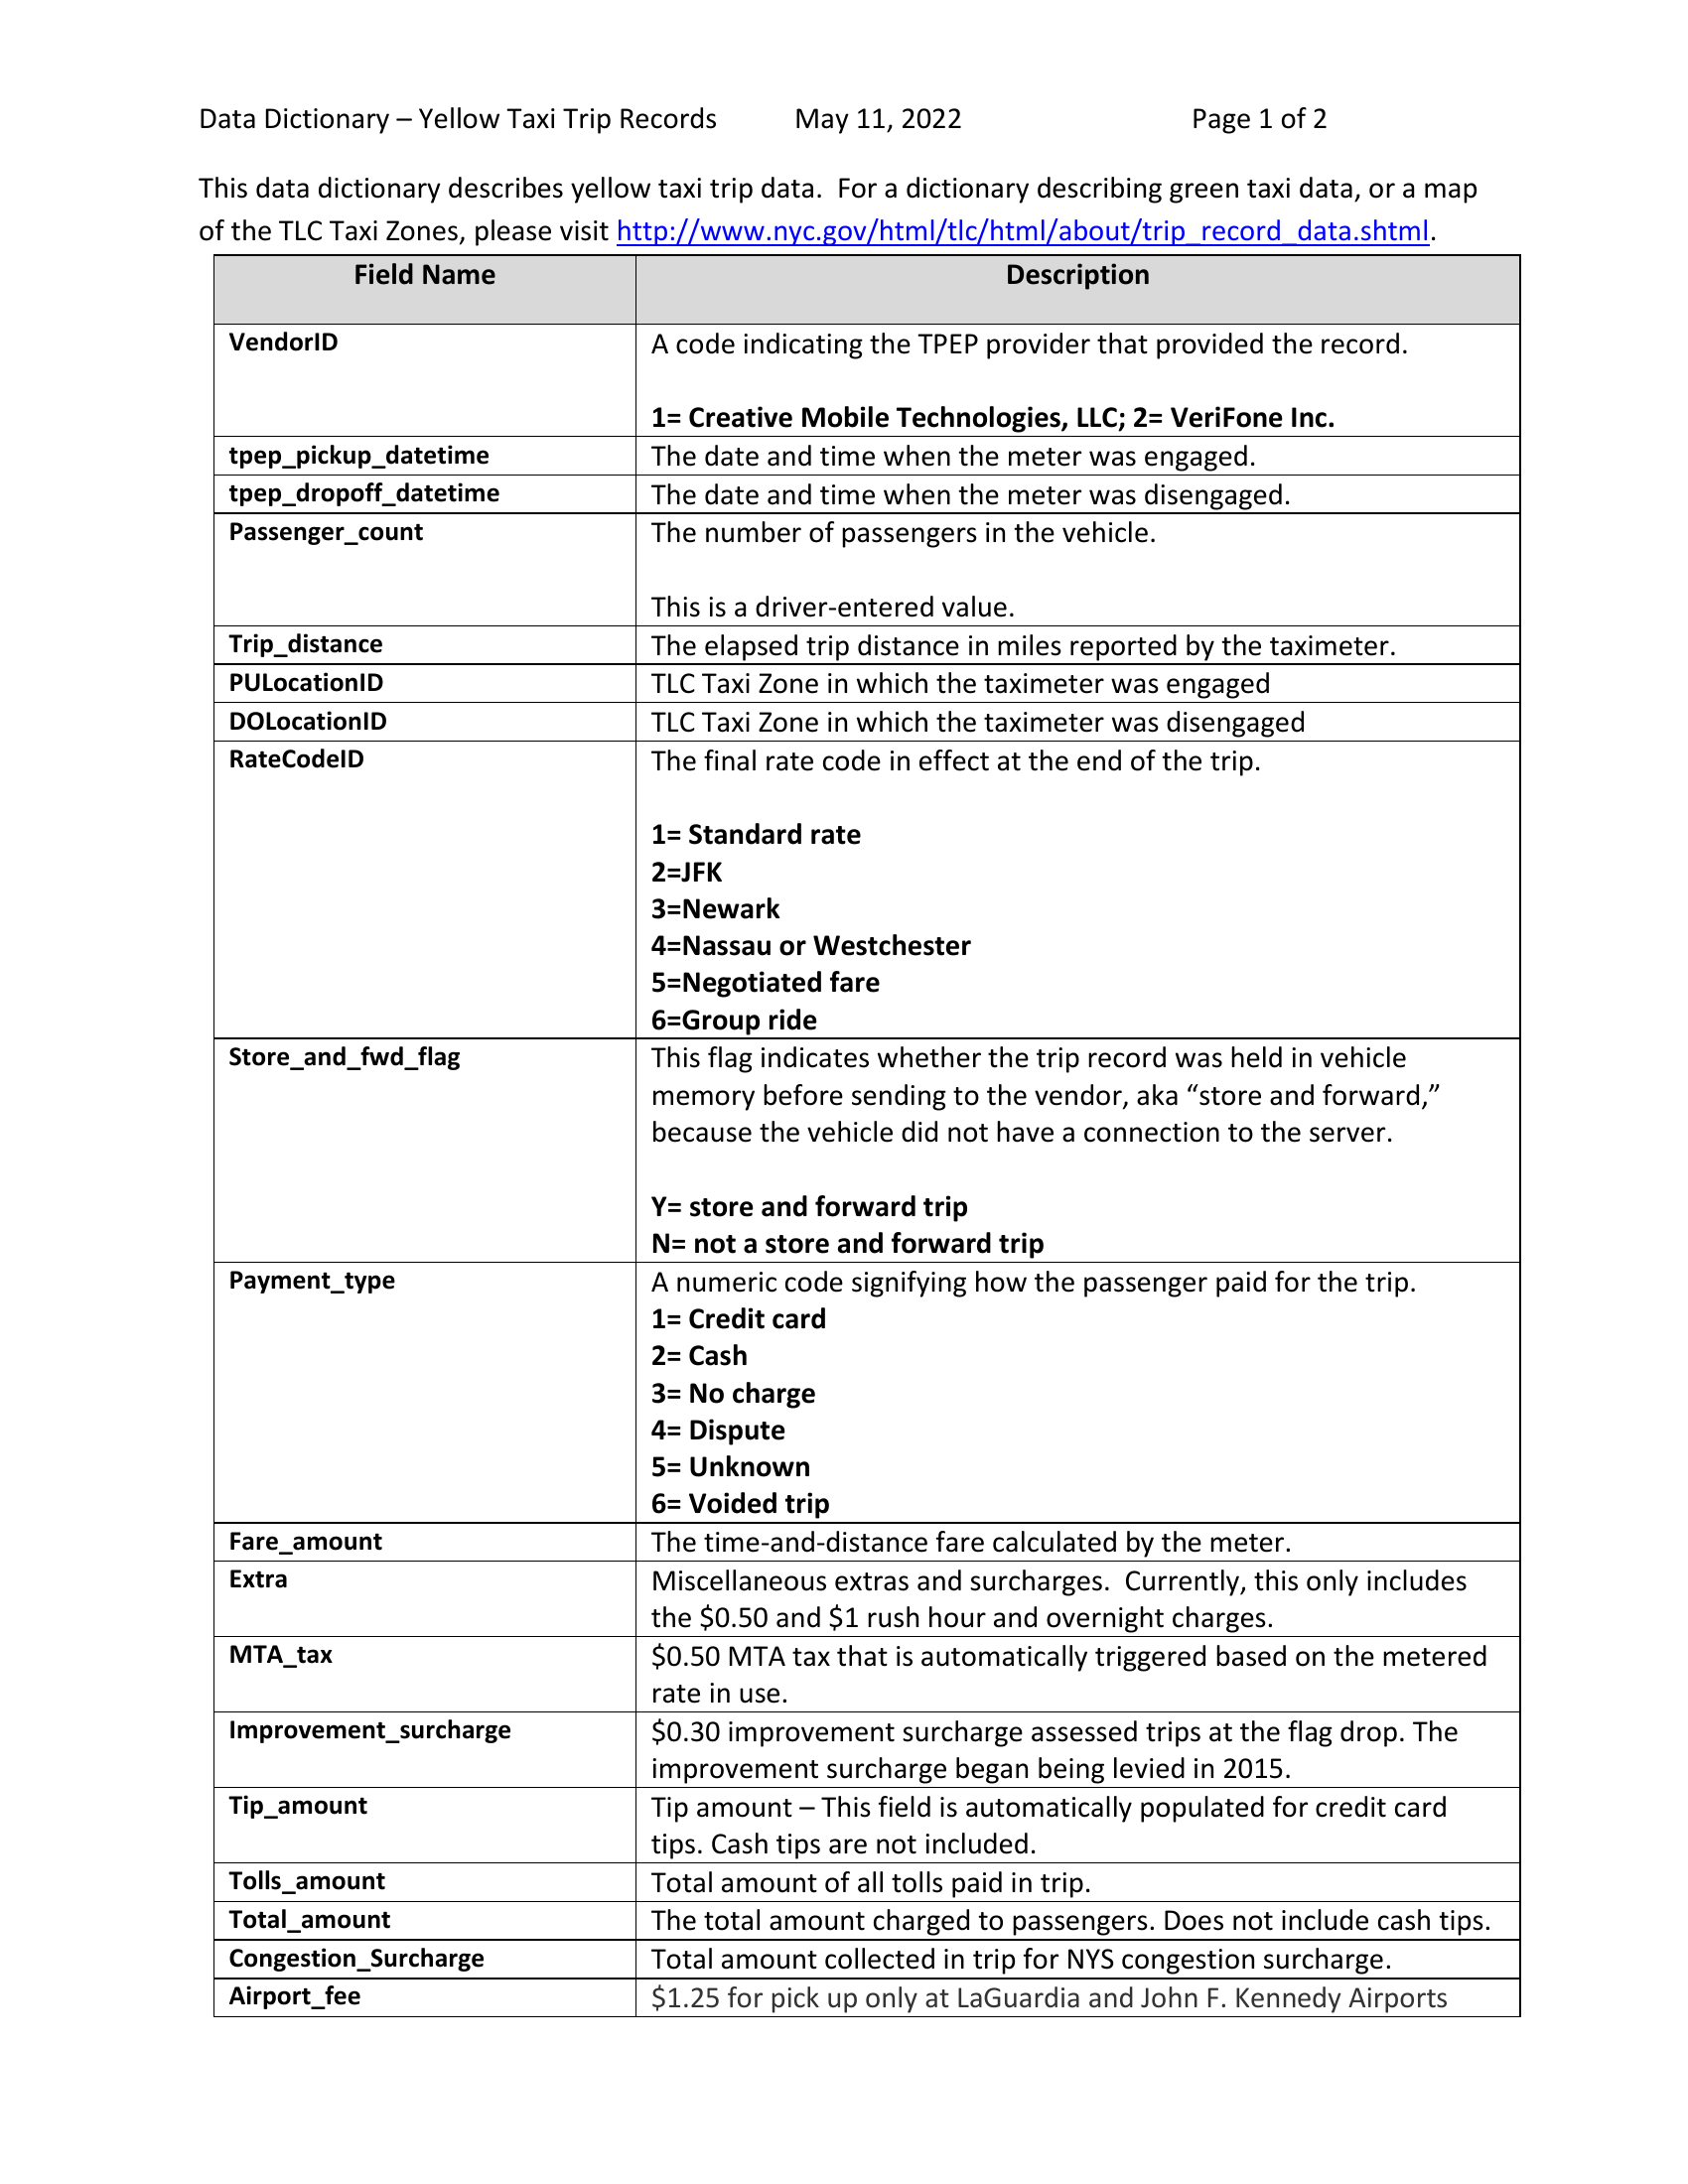

In [36]:
# read data dictionary 
data_dict = convert_from_path("/content/data_dictionary_trip_records_yellow.pdf")
data_dict[0] 

In [37]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.0,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558124 entries, 0 to 3558123
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [39]:
df.shape

(3558124, 19)

In [40]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          132448
trip_distance                 0
RatecodeID               132448
store_and_fwd_flag       132448
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     132448
airport_fee              132448
dtype: int64

In [41]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.558124e+06,3.425676e+06,3.558124e+06,3.425676e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.558124e+06,3.425676e+06,3.425676e+06
mean,1.714216e+00,1.399042e+00,5.968216e+00,1.418163e+00,1.646085e+02,1.624122e+02,1.181859e+00,1.524926e+01,1.021005e+00,4.884199e-01,2.795843e+00,5.622156e-01,2.960561e-01,2.211842e+01,2.282375e+00,9.573366e-02
std,4.877039e-01,9.607126e-01,5.941291e+02,5.702574e+00,6.554112e+01,7.016922e+01,5.104356e-01,2.121836e+02,1.254616e+00,9.378860e-02,3.581685e+00,2.121173e+00,4.810925e-02,2.124623e+02,7.490437e-01,3.357336e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.070000e+02,-7.000000e+00,-5.000000e-01,-8.008000e+01,-6.320000e+01,-3.000000e-01,-9.115500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.140000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.618000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.670000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.450000e+00,0.000000e+00,3.000000e-01,2.334000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.070071e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.958449e+05,8.250000e+00,3.300000e+00,1.400160e+03,8.000900e+02,3.000000e-01,3.958482e+05,2.750000e+00,1.250000e+00


In [42]:
p = figure(plot_width=200, plot_height=200)
p.circle(df["trip_distance"], df["total_amount"], size=20, color="blue", alpha=0.5)
show(p)